<center>
<h4>Diplomatura en CDAAyA 2018 - FaMAF - UNC</h4>
<h2>Análisis y Visualización de Datos</h2>
<h1>Laboratorio 1 - Vida Urbana Versus Vida Rural</h1>
</center>

![title](urban-vs-rural-800x400.jpg)

En la siguiente notebook analizaremos una base de datos obtenida a partir de encuestas a personas que habitan áreas rurales y urbanas, relacionadas a distintos aspectos de su vida.

### Importación Librerias

In [579]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

import statistics
import scipy as sp

### Importación Archivos y previsualización

A continuación, importamos el dataset y el significado de cada variable, de acuerdo a la encuesta:

In [580]:
ds = pd.read_csv('responses.csv' ,encoding='utf8');
print("La estructura de la matriz de datos es: {}".format(ds.shape))
ds.head()

La estructura de la matriz de datos es: (1010, 150)


,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


In [581]:
ds_cols = pd.read_csv('columns.csv' ,encoding='utf8');
ds_cols[ds_cols['short'] == 'Weight']
ds_cols.head()

,original,short
0,I enjoy listening to music.,Music
1,I prefer.,Slow songs or fast songs
2,"Dance, Disco, Funk",Dance
3,Folk music,Folk
4,Country,Country


## Análisis de las Variables Aleatorias Edad y Peso 
### Estadísticos Descriptivos

En una primera instancia, se obtienen los estadísticos descriptivos de las variables peso y edad.

In [582]:
ds[['Age','Weight']].describe()

,Age,Weight
count,1003.000000,990.000000
mean,20.433699,66.405051
std,2.828840,13.839561
min,15.000000,41.000000
25%,19.000000,55.000000
50%,20.000000,64.000000
75%,22.000000,75.000000
max,30.000000,165.000000


In [583]:
print('Omitieron Edad: {}'.format(ds['Age'].isnull().sum()))
print('Omitieron Peso: {}'.format(ds['Weight'].isnull().sum()))
null_peso_edad = ds[(ds['Age'].isnull()) & (ds['Weight'].isnull())].shape[0]
print('Omitieron Edad y Peso: {}'.format(null_peso_edad))

Omitieron Edad: 7
Omitieron Peso: 20
Omitieron Edad y Peso: 4


Como se puede observar, **7** personas omitieron revelar su edad y **20** su peso. Además, **4** de ellas no especificaron ninguna de las dos informaciones.

El **promedio de edad** de los encuestados es de entre 20 y 21 años, con una desviación estándar de +-2.82; mientras que la **media del peso** es de 66.40 Kg, con una desviación estándar de +-13.84 Kg.

Además, el **rango de edad** de los encuestados va de 15 a 30 años, mientras que el **rango de peso** va de 41 a 165 Kg. La **mediana de la edad** es 20 años, mientras que la **mediana del peso** es 64 Kg.

In [584]:
print('Moda de Edad: {}'.format(statistics.mode(ds.Age.dropna())))
print('Moda de Peso: {}'.format(statistics.mode(ds.Weight.dropna())))

Moda de Edad: 19.0
Moda de Peso: 60.0


Vemos, además, que la **moda de la edad** es 19 años, mientras que la **moda del peso** es 60 Kg.

### Análisis Gráfico

Para analizar la **forma de la distribución** de las variables aleatórias estudiadas así como también la **existencia de outliers**, construimos dos tipos de gráficos que nos permiten representar la frecuencia de las mismas: un histograma y un boxplot.

Comenzamos por el histograma de la variable **Edad**.


C:\Users\lprone\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


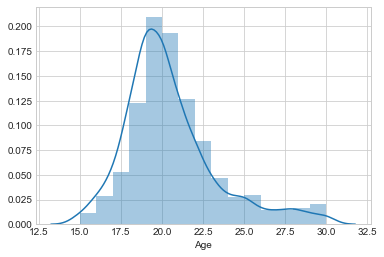

In [585]:
sns.distplot(ds.Age.dropna(), bins=15, hist=True)

El boxplot para esta misma variable:

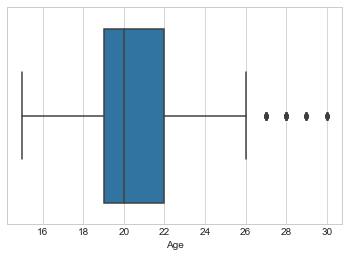

In [586]:
ax = sns.boxplot(x=ds.Age.sort_index())

Por la forma observada de la distribución y la pequeña diferencia entre media y mediana, podemos decir que la distribución de esta variable se parece a una **distribución normal*.

Sin embargo, al efectuar el siguiente **test de normalidad**, se rechaza la hipótesis nula de que se trate de una distribución normal, con una significación del 0.01: 

In [587]:
k2, p = sp.stats.normaltest(ds['Age'].dropna())
alpha = 0.01
print('p = {:g}'.format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("La hipótesis nula puede ser rechazada.")
else:
    print("La hipótesis nula no puede ser rechazada.")

p = 4.89463e-41
La hipótesis nula puede ser rechazada.


Por otro lado, también se observa la presencia de '*valores outliers*', que se alejan considerablemente de la media muestral de 20.43 años. Sin embargo, esto puede deberse a la selección de la muestra en sí, de forma que no sea representativa respecto de la población que se quiere analizar.

A continuación, realizamos el mismo análisis para la variable aleatoria **Peso**, comenzando por graficar el histograma:

C:\Users\lprone\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


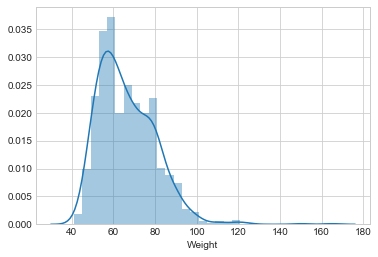

In [588]:
sns.distplot(ds.Weight.dropna(), hist=True)

Y el boxplot para esta misma variable:

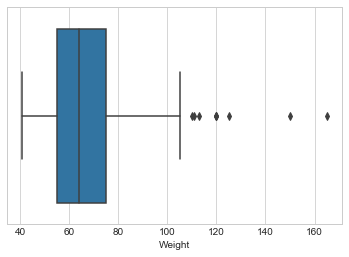

In [589]:
ax = sns.boxplot(x=ds.Weight.sort_index())

Nuevamente vemos que, por la forma observada de la distribución y la baja diferencia entre media y mediana, podemos decir que la distribución de esta variable se asimila a una **distribución normal*.

Sin embargo, cuando efectuamos el **test de normalidad** se rechaza la hipótesis nula de que se trate de una distribución normal, con una significación del 0.01:

In [590]:
k2, p = sp.stats.normaltest(ds['Weight'].dropna())
alpha = 0.01
print('p = {:g}'.format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("La hipótesis nula puede ser rechazada.")
else:
    print("La hipótesis nula no puede ser rechazada.")

p = 2.7774e-56
La hipótesis nula puede ser rechazada.


Finalmente, encontramos valores que parecen *atípicos* en esta distribución por alejarse considerablemente de las medidas de tendencia central, pero totalmente plausibles.

<div class="alert alert-block alert-info">
Analizando los histogramas, boxplot y estadísticos de las variables aleatorias peso y edad concluimos en que **ambas parecen aproximarse a una distribución normal**, ya que la media y mediana se asemejan, al igual que lo hacen las diferencias entre mediana y primer y tercer cuartil.
</div>

### *Análisis de outliers*

Analizamos la presencia de ***outliers*** tanto en la variable peso como en la edad:

__Edad__: En esta variable vemos pocos casos de outliers, lo que indica que el universo del que se tomaron las muestras estaba compuesto en su mayoría por personas de entre 15 y 25 años considerandose las personas entrevistadas con edades fuera de ese rango atípicas para la muestra.

__Peso__: En esta variable vemos gran cantidad de outliers lo que indica la presencia de individuos de la muestra con diferentes grados de sobrepeso o de deficiencia de peso, que resulta llamativo y preocupante por el rango etario de la muestra.

<div class="alert alert-block alert-info">
Sin embargo, optamos por **no descartar ningún valor atípico**, ya que, si bien parece haber outliers, los **valores son plausibles** y su caracterización como tales puede deberse a problemas en el muestreo.
</div>

## Análisis de la Edad y el Peso por Género 
### Estadísticos Descriptivos

Para empezar, calculamos los estadísticos descriptivos de la edad y el peso, discriminados por género:

In [591]:
ds.groupby('Gender')['Age',"Weight"].describe().transpose()

Gender            female        male
Age    count  589.000000  409.000000
       mean    20.113752   20.872861
       std      2.792537    2.796789
       min     15.000000   15.000000
       25%     18.000000   19.000000
       50%     20.000000   20.000000
       75%     21.000000   22.000000
       max     30.000000   30.000000
Weight count  580.000000  405.000000
       mean    58.963793   77.088889
       std     10.005719   11.349838
       min     41.000000   53.000000
       25%     53.000000   70.000000
       50%     57.000000   77.000000
       75%     63.000000   83.000000
       max    165.000000  150.000000

In [592]:
print('Moda de Edad/Femenino: {}'.format(statistics.mode(ds[ds["Gender"]=="female"].Age.dropna())))
print('Moda de Edad/Masculino: {}'.format(statistics.mode(ds[ds["Gender"]=="male"].Age.dropna())))

print('Moda de Peso/Fenenino: {}'.format(statistics.mode(ds[ds["Gender"]=="female"].Weight.dropna())))
print('Moda de Peso/Masculino: {}'.format(statistics.mode(ds[ds["Gender"]=="male"].Weight.dropna())))

Moda de Edad/Femenino: 19.0
Moda de Edad/Masculino: 19.0
Moda de Peso/Fenenino: 60.0
Moda de Peso/Masculino: 80.0


Vemos que la **media de la edad** para ambos grupos de datos es bastante similar, al igual que la desviación estándar. Además **la mediana coincide**.

Con respecto al **peso**, sí encontramos una diferencia considerable entre la **media** de ambos grupos de datos, siendo mayor la del género masculino. Lo mismo ocurre con la **mediana**, cuyo valor es mayor para el género masculino que para el femenino.

Nuevamente, tanto para la edad como para el peso, las medidas de tendencia central son parecidas.

### Análisis Gráfico

A continuación, graficamos las distribuciones de frecuencia de **la edad y el peso por género**. Comezamos por la **edad**:

C:\Users\lprone\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


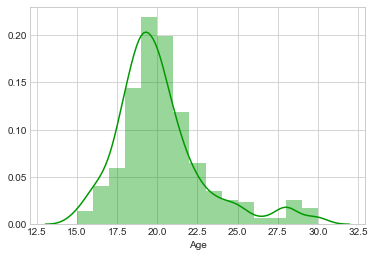

In [593]:
sns.distplot(ds[ds["Gender"]=="female"].Age.dropna(),bins=15, hist=True, rug=False, color = '#009900')

C:\Users\lprone\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


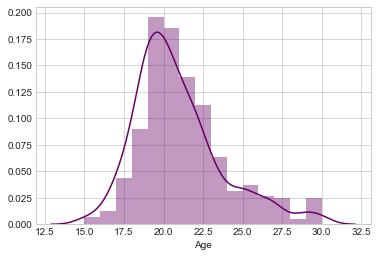

In [594]:
sns.distplot(ds[ds["Gender"]=="male"].Age.dropna(), bins=15, hist=True, rug=False, color = '#660066')

Para comparar estas distribuciones, las ubicamos en el mismo plano:

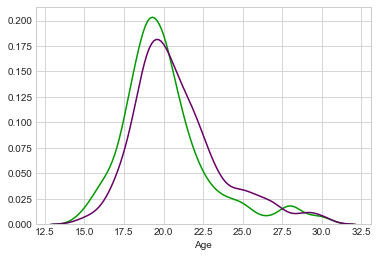

In [595]:
sns.distplot(ds[ds["Gender"]=="female"].Age.dropna(), bins=15, hist=False, rug=False, color = '#009900')
sns.distplot(ds[ds["Gender"]=="male"].Age.dropna(), bins=15, hist=False, rug=False, color = '#660066')

Además, utilizamos simultáneamente un boxplot:

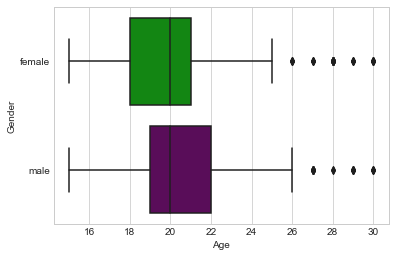

In [596]:
sns.boxplot(data=ds,x="Age", y="Gender",palette=['#009900', '#660066'])

Vemos que ambas distribuciones son muy similares. La media de la edad masculina es apenas superior a la media de la femenina. Además, el grupo femenino presenta algunos valores outliers más que el masculino.

Realizamos el mismo análisis, pero para el **peso**:

C:\Users\lprone\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


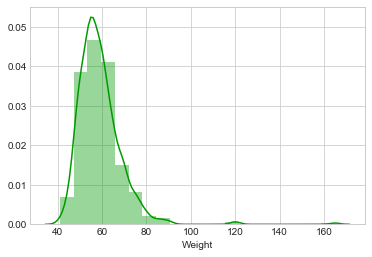

In [597]:
sns.distplot(ds[ds["Gender"]=="female"].Weight.dropna(), bins=20, hist=True, rug=False, color = '#009900')

C:\Users\lprone\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


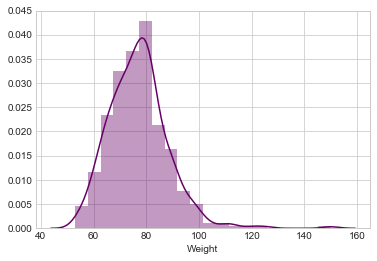

In [598]:
sns.distplot(ds[ds["Gender"]=="male"].Weight.dropna(), bins=20, hist=True, rug=False, color = '#660066')

Para comparar estas distribuciones, las ubicamos en el mismo plano:

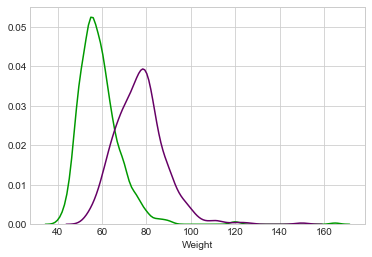

In [599]:
sns.distplot(ds[ds["Gender"]=="female"].Weight.dropna(), bins=20, hist=False, rug=False, color = '#009900')
sns.distplot(ds[ds["Gender"]=="male"].Weight.dropna(), bins=20, hist=False, rug=False, color = '#660066')

Además, graficamos también un boxplot:

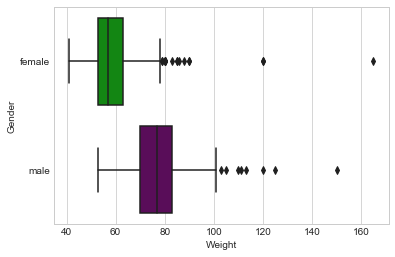

In [600]:
sns.boxplot(data=ds,x="Weight", y="Gender",palette=['#009900', '#660066'])

En este caso, **las distribuciones ya no son tan similares**. La media del peso masculino es bastante superior a la media del femenina. Además, la dispersión es menor en la distribución del peso femenino. Sin embargo, el grupo femenino presenta algunos valores outliers más que el masculino y más alejados de las medidas de tendencia central.

<div class="alert alert-block alert-info">
Podemos decir, en base a los gráficos, las medidas de tendencia central y los rangos intercuartílicos 2 y 3, que todas estas distribuciones se asemejan a una distribución normal.
</div>

### Correlación entre Edad, Peso y Género

Calculamos la correlación entre las variables previamente analizadas. Para el género, construimos una variable tipo *boolean*, en la que el género femenino es 1 y el masculino es 0. Esto nos permitirá calcular la correlación de esta variable categórica con las otras dos, que son numéricas.

In [601]:
ds['Gender_bool'] = (ds.Gender == 'female')

ds_filt_cor = ds[['Age', 'Weight', 'Gender_bool']]

ds_filt_cor.corr()

,Age,Weight,Gender_bool
Age,1.000000,0.237722,-0.134972
Weight,0.237722,1.000000,-0.639831
Gender_bool,-0.134972,-0.639831,1.000000


In [602]:
ds.groupby('Gender')['Age',"Weight"].corr()

Age    Weight
Gender                           
female Age     1.000000  0.156477
       Weight  0.156477  1.000000
male   Age     1.000000  0.253514
       Weight  0.253514  1.000000

En el siguiente gráfico, se puede ver el diagrama de dispersión de edad y peso, por género:

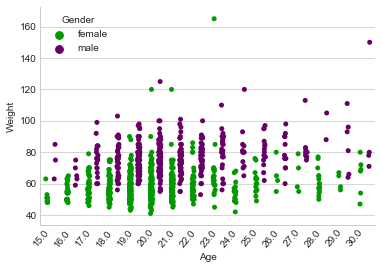

In [603]:
graph = sns.stripplot(x="Age", y="Weight", hue="Gender", data=ds, jitter=True, palette = ['#009900', '#660066'], dodge=True)
graph.set_xticklabels(graph.get_xticklabels(), rotation=50, ha="right")

sns.despine()

Tanto la tabla de correlación como el gráfico previo, nos permiten arribar a las siguientes **conclusiones**:
* Por un lado, el peso y la edad están correlacionadas positivamente, es decir, a mayor edad, mayor peso. Además, esta correlación es más marcada para el género masculino.
* Por otro lado, edad y género tienen una correlación negativa, pero no tan marcada. Esto quiere decir que a mayor edad, más probabilidades de que sea género masculino, mientras que siendo de género masculino, aumenta su edad.
* Finalmente, peso y género tienen una correlación negativa bastante marcada. Esto quiere decir que a mayor peso, más probabilidades de que sea género masculino, , mientras que siendo de género masculino, aumenta su peso.

## Análisis del Nivel de Estudio según Lugar de Residencia

In [604]:
fdp_education = ds.groupby('Village - town')['Education'].value_counts(normalize=True)
fdp_education.sort_index(0)

Village - town  Education                       
city            college/bachelor degree             0.214993
                currently a primary school pupil    0.007072
                doctorate degree                    0.005658
                masters degree                      0.077793
                primary school                      0.079208
                secondary school                    0.615276
village         college/bachelor degree             0.201342
                currently a primary school pupil    0.016779
                doctorate degree                    0.003356
                masters degree                      0.083893
                primary school                      0.077181
                secondary school                    0.617450
Name: Education, dtype: float64

In [605]:
fdp_edu_df = pd.DataFrame(fdp_education)
fdp_edu_df

Education
Village - town Education                                  
city           secondary school                   0.615276
               college/bachelor degree            0.214993
               primary school                     0.079208
               masters degree                     0.077793
               currently a primary school pupil   0.007072
               doctorate degree                   0.005658
village        secondary school                   0.617450
               college/bachelor degree            0.201342
               masters degree                     0.083893
               primary school                     0.077181
               currently a primary school pupil   0.016779
               doctorate degree                   0.003356

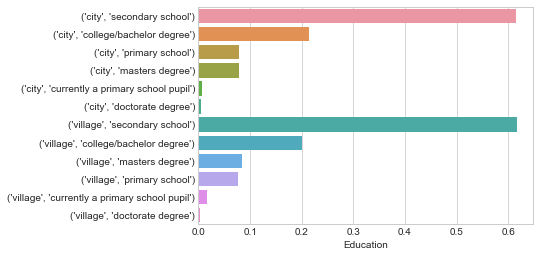

In [606]:
sns.barplot(x='Education', y=fdp_edu_df.index.values, data=fdp_edu_df)

Analizando el gráfico vemos que hay dependencia entre el origen del individuo encuestado y el nivel educativo alcanzado.
Igualmente realizamos un test de hipótesis para verificar esta dependencia.
Consideramos como hipótesis nula __"Nivel educativo no es independiente de Origen"__

In [607]:
dep_place_education = pd.crosstab(index = ds['Village - town'],columns=ds.Education, normalize=True, margins=False)

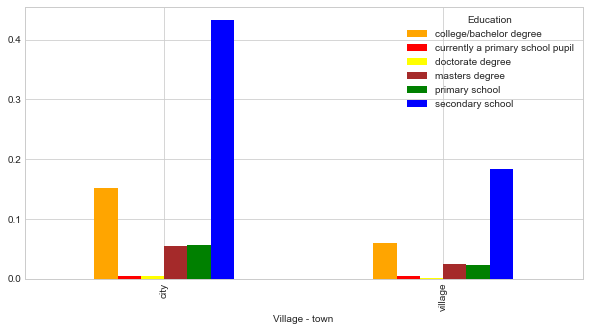

In [608]:
#este grafico es el mismo que arriba
dep_place_education.plot.bar(color=['orange','red','yellow','brown','green','blue'], figsize=(10, 5))

In [609]:
chi2, p_value, dof, ex = sp.stats.chi2_contingency(dep_place_education)
sp.stats.chi2_contingency(dep_place_education)

(0.0024915084292964898,
 0.9999999835328564,
 5,
 array([[0.14839633, 0.00699983, 0.00349991, 0.05599861, 0.05529863,
         0.43328928],
        [0.06254895, 0.00295042, 0.00147521, 0.02360338, 0.02330833,
         0.18263112]]))

In [610]:
if alpha < 1 - p_value:
    print("La hipótesis nula puede ser rechazada. Hay independencia entre las variables")
else:
    print("La hipótesis nula no puede ser rechazada. No hay independencia entre las variables.")

La hipótesis nula no puede ser rechazada. No hay independencia entre las variables.


Consideramos interesante también analzar independencia entre el sexo de la persona encuestada y su nivel educativo

In [611]:
fdp_gender_education = ds.groupby('Gender')['Education'].value_counts(normalize=True)
fdp_gender_education.sort_index(0)

Gender  Education                       
female  college/bachelor degree             0.207770
        currently a primary school pupil    0.010135
        masters degree                      0.074324
        primary school                      0.091216
        secondary school                    0.616554
male    college/bachelor degree             0.216545
        currently a primary school pupil    0.009732
        doctorate degree                    0.012165
        masters degree                      0.087591
        primary school                      0.058394
        secondary school                    0.615572
Name: Education, dtype: float64

In [612]:
fdp_gender_education.sort_index(0)

Gender  Education                       
female  college/bachelor degree             0.207770
        currently a primary school pupil    0.010135
        masters degree                      0.074324
        primary school                      0.091216
        secondary school                    0.616554
male    college/bachelor degree             0.216545
        currently a primary school pupil    0.009732
        doctorate degree                    0.012165
        masters degree                      0.087591
        primary school                      0.058394
        secondary school                    0.615572
Name: Education, dtype: float64

In [613]:
fdp_gen_edu_df = pd.DataFrame(fdp_gender_education)
fdp_gen_edu_df

Education
Gender Education                                  
female secondary school                   0.616554
       college/bachelor degree            0.207770
       primary school                     0.091216
       masters degree                     0.074324
       currently a primary school pupil   0.010135
male   secondary school                   0.615572
       college/bachelor degree            0.216545
       masters degree                     0.087591
       primary school                     0.058394
       doctorate degree                   0.012165
       currently a primary school pupil   0.009732

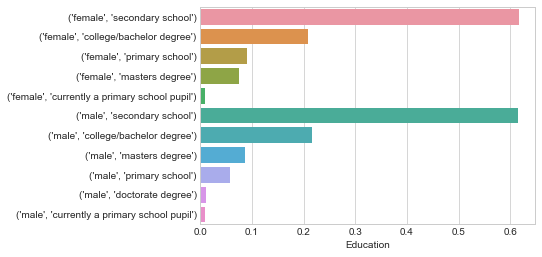

In [614]:
sns.barplot(x='Education', y=fdp_gen_edu_df.index.values, data=fdp_gen_edu_df)



In [615]:
dep_gender_education= pd.crosstab(index=ds.Gender,columns=ds.Education, normalize=True, margins=False)

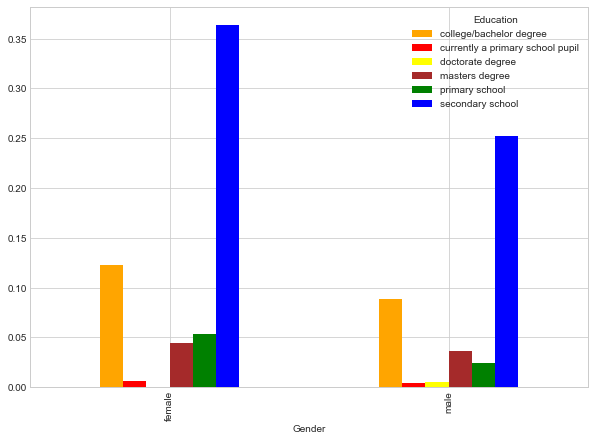

In [616]:
# mismo grafico que mas arriba
dep_gender_education.plot.bar(color=['orange', 'red','yellow','brown','green','blue'], figsize=(10, 7))

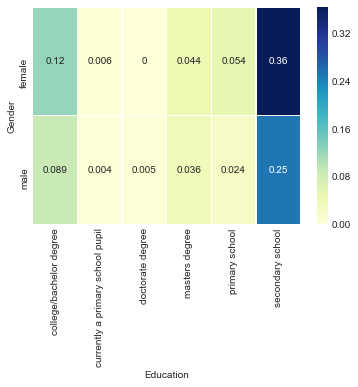

In [617]:
# me parece que no aporta, podria volar
sns.heatmap(dep_gender_education, linewidth=0.5,cmap="YlGnBu", annot=True)

Analizando el gráfico vemos que hay dependencia entre el origen del individuo encuestado y el nivel educativo alcanzado.
Igualmente realizamos un test de hipótesis para verificar esta dependencia.
Consideramos como hipótesis nula __"Nivel educativo no es independiente del Genero"__

In [618]:
chi2, p_value, dof, ex = sp.stats.chi2_contingency(dep_gender_education)
sp.stats.chi2_contingency(dep_gender_education)

(0.011156964549670191,
 0.9999993033995688,
 5,
 array([[0.12475435, 0.00588464, 0.00294232, 0.04707711, 0.04590019,
         0.3636707 ],
        [0.08661155, 0.00408545, 0.00204273, 0.0326836 , 0.03186651,
         0.25248084]]))

In [619]:
if alpha < 1 - p_value:
    print("La hipótesis nula puede ser rechazada. Hay independencia entre las variables")
else:
    print("La hipótesis nula no puede ser rechazada. No hay independencia entre las variables.")

La hipótesis nula no puede ser rechazada. No hay independencia entre las variables.


El test confirma la dependencia entre estas variables observada graficamente

# Análisis fuma / consume alcohol

In [620]:
ds.Smoking.value_counts(normalize=True)

tried smoking     0.429142
never smoked      0.207585
current smoker    0.188623
former smoker     0.174651
Name: Smoking, dtype: float64

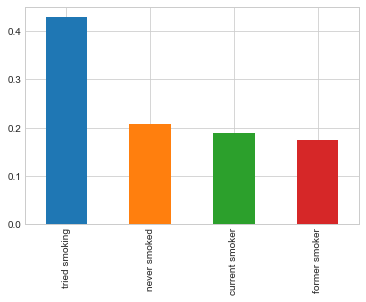

In [621]:
ds.Smoking.value_counts(normalize=True).plot(kind='bar')

Analizando datos de la tabla de probabilidad y gráfico de las diferentes categorías de consumo vemos que predominan las personas que no consumen cigarrillos con frecuencuencia por sobre las que si lo hacen.

In [622]:
ds.Alcohol.value_counts(normalize=True)

social drinker    0.655721
drink a lot       0.220896
never             0.123383
Name: Alcohol, dtype: float64

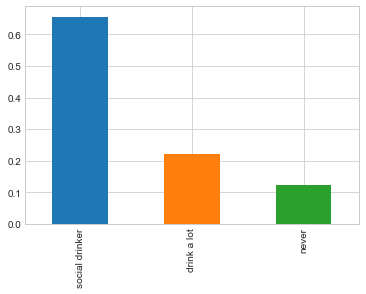

In [623]:
ds.Alcohol.value_counts(normalize=True).plot(kind='bar')

Con respecto al consumo de alcohol vemos que la gran mayoría de los encuestado consume alcohol, aunque solo una pequeña parte lo hace con alta frecuencia. La mayoría de los encuestados bebe en evventos sociales.

#### Analizaremos ahora la relacion entre consumo de alcohol y cigarrillo para determinar si existe dependencia entre estas 2 variables

In [624]:
cross_alcohol_smoking = pd.crosstab(index=ds.Smoking,columns=ds.Alcohol, normalize=True, margins=False)
cross_alcohol_smoking

Alcohol,drink a lot,never,social drinker
Smoking,,,
current smoker,0.078,0.011,0.099
former smoker,0.055,0.011,0.109
never smoked,0.015,0.061,0.131
tried smoking,0.072,0.039,0.319


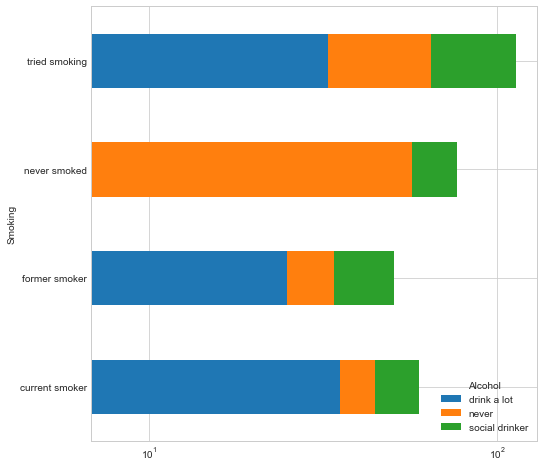

In [625]:
cross_alcohol_smoking.apply(lambda r: r/r.sum() * 100,axis=0).plot(kind='barh', stacked=True, logx=True,figsize=(8,8))

In [626]:
chi2, p_value, dof, ex = sp.stats.chi2_contingency(cross_alcohol_smoking)
sp.stats.chi2_contingency(cross_alcohol_smoking)

(0.1407461035508088,
 0.9999448955822006,
 6,
 array([[0.04136 , 0.022936, 0.123704],
        [0.0385  , 0.02135 , 0.11515 ],
        [0.04554 , 0.025254, 0.136206],
        [0.0946  , 0.05246 , 0.28294 ]]))

In [627]:
if alpha < 1 - p_value:
    print("La hipótesis nula puede ser rechazada. Hay independencia entre las variables")
else:
    print("La hipótesis nula no puede ser rechazada. No hay independencia entre las variables.")

La hipótesis nula no puede ser rechazada. No hay independencia entre las variables.


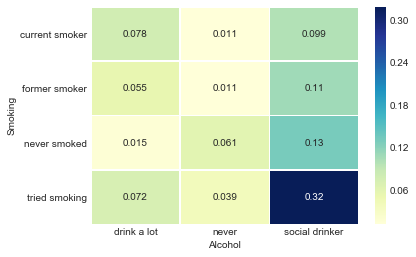

In [628]:
sns.heatmap(cross_alcohol_smoking, linewidth=0.5,cmap="YlGnBu", annot=True)

Tanto el análisis gráfico gráfico como el test de dependencia indican que existe relación entre el consumo de alcohol y cigarrillo. Este dato resulta relevante al momento de analizar la variación en el consumo de cigarrillos al impedir fumar en bares como así tambien que puede ocurrir con el consumo de alcohol si disminuye la cantidad de fumadores que lo consume

In [629]:
dep_gender_alcohol = pd.crosstab(index=ds['Gender'],columns=ds['Alcohol'], normalize=True, margins=False)
dep_gender_alcohol

Alcohol,drink a lot,never,social drinker
Gender,,,
female,0.104104,0.068068,0.418418
male,0.117117,0.055055,0.237237


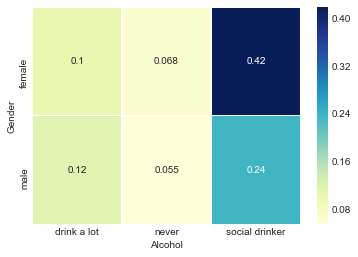

In [630]:
sns.heatmap(dep_gender_alcohol, linewidth=0.5,cmap="YlGnBu", annot=True)

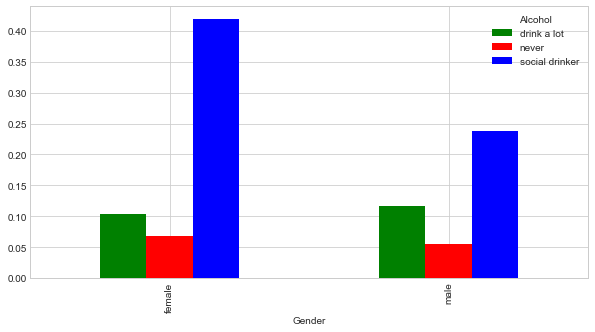

In [631]:
dep_gender_alcohol.plot.bar(color=['green', 'red', 'blue'], figsize=(10, 5))

In [632]:
fdp_gender_alcohol = ds.groupby('Gender')['Alcohol'].value_counts(normalize=True)
fdp_gender_alcohol.sort_index(0)

Gender  Alcohol       
female  drink a lot       0.176271
        never             0.115254
        social drinker    0.708475
male    drink a lot       0.286064
        never             0.134474
        social drinker    0.579462
Name: Alcohol, dtype: float64

In [633]:
fdp_gender_alcohol = pd.DataFrame(fdp_gender_alcohol)
fdp_gender_alcohol

Alcohol
Gender Alcohol                 
female social drinker  0.708475
       drink a lot     0.176271
       never           0.115254
male   social drinker  0.579462
       drink a lot     0.286064
       never           0.134474

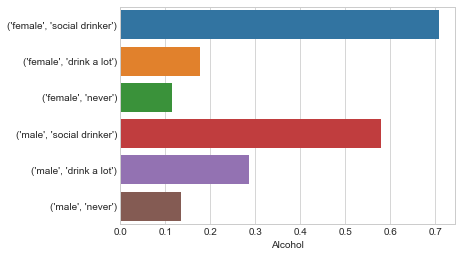

In [634]:
sns.barplot(x='Alcohol', y=fdp_gender_alcohol.index.values, data=fdp_gender_alcohol)

In [635]:
cross_age_smoking = pd.crosstab(index=ds.Smoking,columns=ds.Age, normalize=True, margins=False)
cross_age_smoking

Age,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0
Smoking,,,,,,,,,,,,,,,,
current smoker,0.001005,0.001005,0.010050,0.019095,0.038191,0.041206,0.025126,0.014070,0.017085,0.00402,0.005025,0.004020,0.001005,0.003015,0.002010,0.003015
former smoker,0.000000,0.006030,0.007035,0.022111,0.036181,0.023116,0.030151,0.012060,0.009045,0.00402,0.004020,0.005025,0.002010,0.007035,0.004020,0.004020
never smoked,0.006030,0.012060,0.019095,0.025126,0.043216,0.030151,0.018090,0.011055,0.007035,0.01206,0.007035,0.003015,0.003015,0.003015,0.002010,0.002010
tried smoking,0.004020,0.010050,0.017085,0.056281,0.090452,0.098492,0.054271,0.047236,0.013065,0.00804,0.014070,0.003015,0.008040,0.003015,0.003015,0.001005


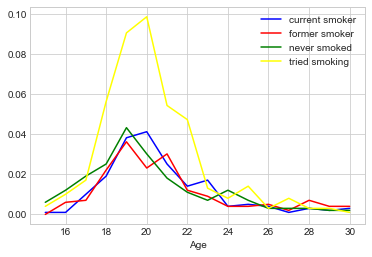

In [636]:
plt.plot(cross_age_smoking.axes[1],cross_age_smoking.values[0], 'blue')
plt.plot(cross_age_smoking.axes[1],cross_age_smoking.values[1], 'red')
plt.plot(cross_age_smoking.axes[1],cross_age_smoking.values[2], 'green')
plt.plot(cross_age_smoking.axes[1],cross_age_smoking.values[3], 'yellow')
plt.legend(cross_age_smoking.axes[0])
plt.xlabel('Age')
plt.show()

In [637]:
cross_age_alcohol = pd.crosstab(index=ds.Alcohol,columns=ds.Age, normalize=True, margins=False)
cross_age_alcohol

Age,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0
Alcohol,,,,,,,,,,,,,,,,
drink a lot,0.001002,0.001002,0.012024,0.024048,0.056112,0.033066,0.031062,0.020040,0.012024,0.006012,0.010020,0.003006,0.002004,0.004008,0.003006,0.004008
never,0.006012,0.013026,0.010020,0.006012,0.020040,0.015030,0.015030,0.011022,0.005010,0.006012,0.002004,0.004008,0.002004,0.001002,0.001002,0.004008
social drinker,0.004008,0.015030,0.031062,0.091182,0.133267,0.145291,0.081162,0.053106,0.029058,0.016032,0.018036,0.008016,0.010020,0.012024,0.007014,0.002004


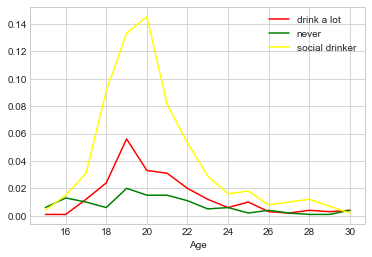

In [638]:
plt.plot(cross_age_alcohol.axes[1],cross_age_alcohol.values[0], 'red')
plt.plot(cross_age_alcohol.axes[1],cross_age_alcohol.values[1], 'green')
plt.plot(cross_age_alcohol.axes[1],cross_age_alcohol.values[2], 'yellow')
plt.legend(cross_age_alcohol.axes[0])
plt.xlabel('Age')
plt.show()

In [639]:
internet_village_town = pd.crosstab(index=ds['Village - town'],columns=ds['Internet usage'], normalize=True, margins=False)
internet_village_town

Internet usage,few hours a day,less than an hour a day,most of the day,no time at all
Village - town,,,,
city,0.524851,0.089463,0.087475,0.000994
village,0.212724,0.047714,0.034791,0.001988


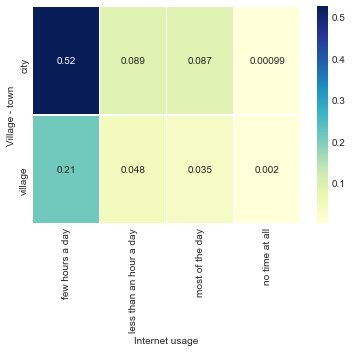

In [640]:
sns.heatmap(internet_village_town, linewidth=0.5,cmap="YlGnBu", annot=True)